<a href="https://colab.research.google.com/github/svfabi/Fabiano/blob/master/Ajustado_Formula_Aproxima%C3%A7%C3%A3osomatorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

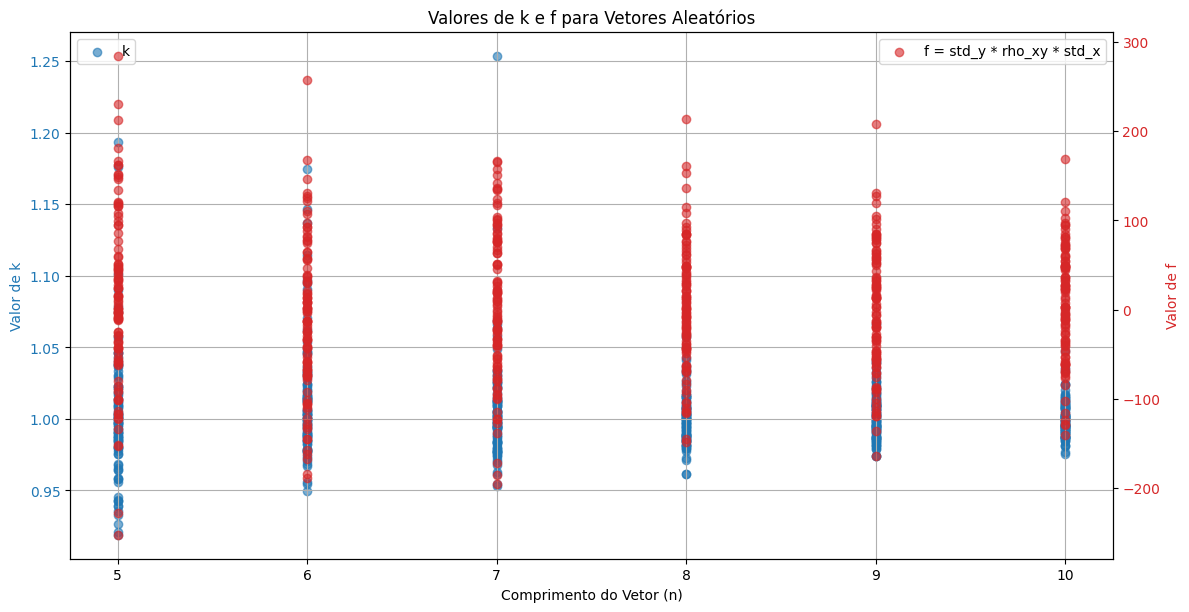

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Funções auxiliares
def calculate_mean(vector):
    return np.mean(vector)

def calculate_std(vector):
    return np.std(vector, ddof=1)

def calculate_covariance(x, y):
    return np.cov(x, y, ddof=1)[0][1]

def calculate_f_b(x, y):
    std_x = calculate_std(x)
    covariance_xy = calculate_covariance(x, y)
    f_b = covariance_xy / std_x
    return f_b

# Função para calcular k e f
def calcular_k_e_f(x, y):
    n = len(x)
    mean_x = calculate_mean(x)
    mean_y = calculate_mean(y)
    std_x = calculate_std(x)
    std_y = calculate_std(y)
    cov_xy = calculate_covariance(x, y)
    rho_xy = cov_xy / (std_x * std_y)

    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)

    # Fórmula corrigida para k
    k = (sum_xy) / (n * mean_x * mean_y + n * std_y * (rho_xy * std_x))

    # Calculando f = rho_xy * std_y
    f = std_y*rho_xy * std_x

    return k, f, sum_x, sum_y

# Parâmetros para geração de vetores aleatórios
n_vetores = 100  # Número de vetores gerados para cada comprimento de vetor
n_Len_Vetor = 10  # Comprimento máximo do vetor gerado aleatoriamente
n_Len_Vetor_Inicial = 5  # Comprimento inicial do vetor gerado aleatoriamente
n_Valoresx = 20  # Valor máximo dos valores de xi
n_Valoresy = 120  # Valor máximo dos valores de yi

comprimentos = np.arange(n_Len_Vetor_Inicial, n_Len_Vetor + 1)
ks = []
fs = []
somas_x = []
somas_y = []

for n in comprimentos:
    for _ in range(n_vetores):
        x = np.random.randint(0, n_Valoresx, n)
        y = np.random.randint(0, n_Valoresy, n)
        k, f, sum_x, sum_y = calcular_k_e_f(x, y)
        ks.append(k)
        fs.append(f)
        somas_x.append(sum_x)
        somas_y.append(sum_y)

# Plotar os resultados
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Comprimento do Vetor (n)')
ax1.set_ylabel('Valor de k', color=color)
ax1.scatter(comprimentos.repeat(n_vetores), ks, color=color, alpha=0.6, label='k')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()  # Instancia um segundo eixo que compartilha o mesmo eixo x
color = 'tab:red'
ax2.set_ylabel('Valor de f', color=color)
ax2.scatter(comprimentos.repeat(n_vetores), fs, color=color, alpha=0.6, label='f = std_y * rho_xy * std_x')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # Ajusta o layout para que não haja sobreposição
plt.title('Valores de k e f para Vetores Aleatórios')
plt.show()
